In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vehicles_us.csv')
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


**Here we can now see our data layed out and can tell there are some missing values as well as some things we need to convert to datetime, we will also be converting and enriching our data to make it easier to work with**

In [5]:
#convert 'date_posted' do a datetime 
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [6]:
#Replace is_4wd NaNs with 0 (assume not 4wd)
df['is_4wd'] = df['is_4wd'].fillna(0).astype(int)

#fill paint_color with 'unknown'
df['paint_color'] = df['paint_color'].fillna('unknown')

#for now i wil drop the missing odometer and model year
df = df.dropna(subset=['model_year', 'odometer'])

In [7]:
df = df[df['price'] > 0] # remove price == 0 (likely invalid listings)
df = df[df['price'] < 100000] # cap at 100k for now (adjustable)

**I will now be cleaning up the data for the odometer just like I did for price**

In [8]:
df['odometer'].describe()

count     40551.000000
mean     115412.902099
std       65222.175675
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

#### some listings have odometer = 0  (probably not new cars)
#### some have values up to 990,000 miles, 
* could be valid for commercial vehicles but a 
* error if its personal vehicles

In [9]:
df = df[df['odometer'] >= 1000]
df = df[df['odometer'] <= 300000]

**Now i will move on to cleaning the 'model_year'**

In [10]:
df['model_year'].describe()

count    39507.000000
mean      2009.828840
std          6.193325
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [11]:
# clean model_year
df = df[(df['model_year'] >= 1908) & (df['model_year'] <= 2022)]
df['model_year'] = df['model_year'].astype(int) # convert from float to int for clarity 

## Visualise data

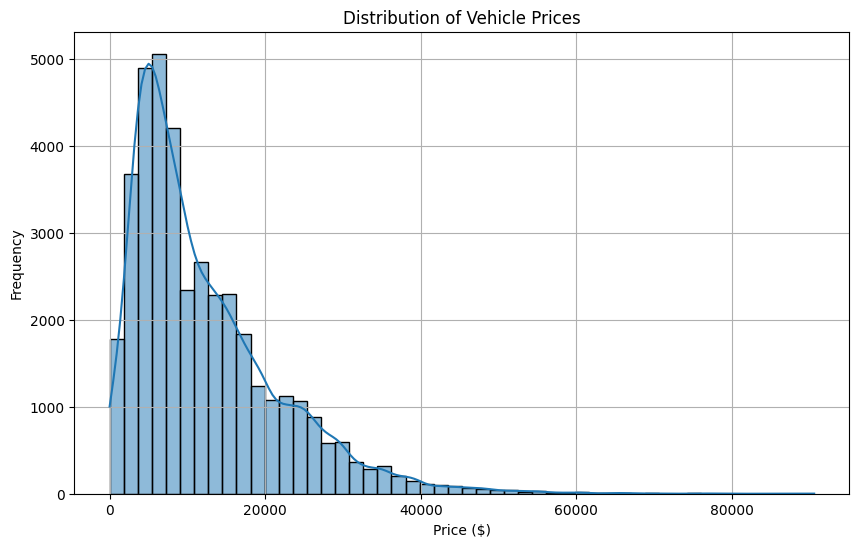

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

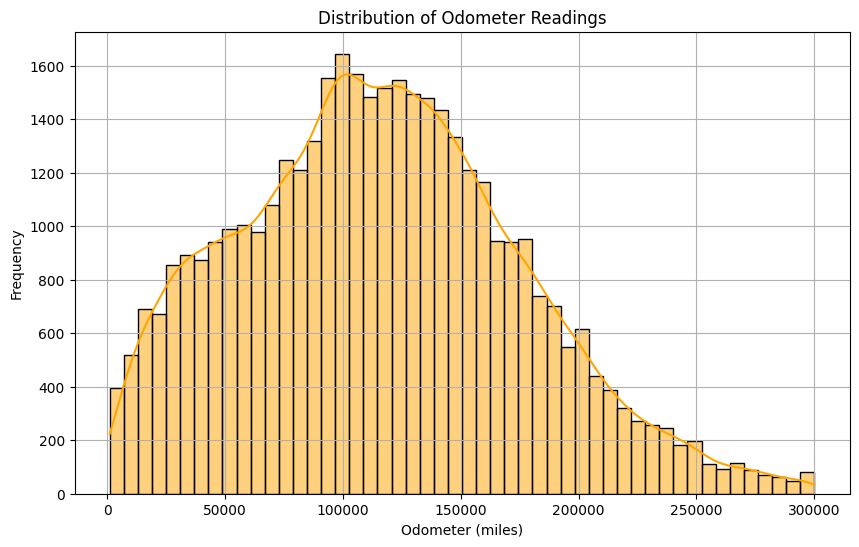

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['odometer'], bins=50, kde=True, color='orange')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


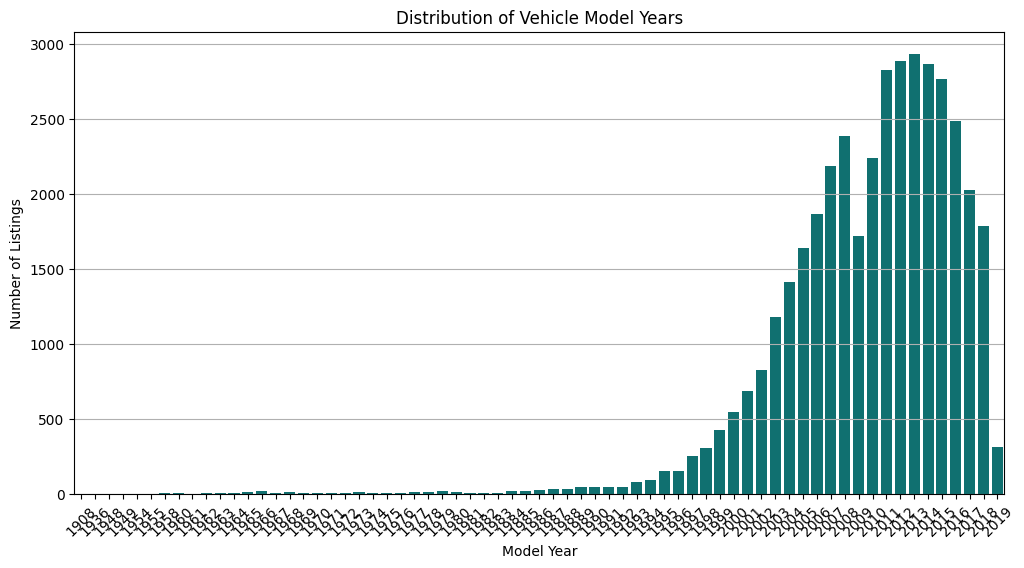

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='model_year', order=sorted(df['model_year'].unique()), color='teal')
plt.xticks(rotation=45)
plt.title('Distribution of Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Listings')
plt.grid(True, axis='y')
plt.show()

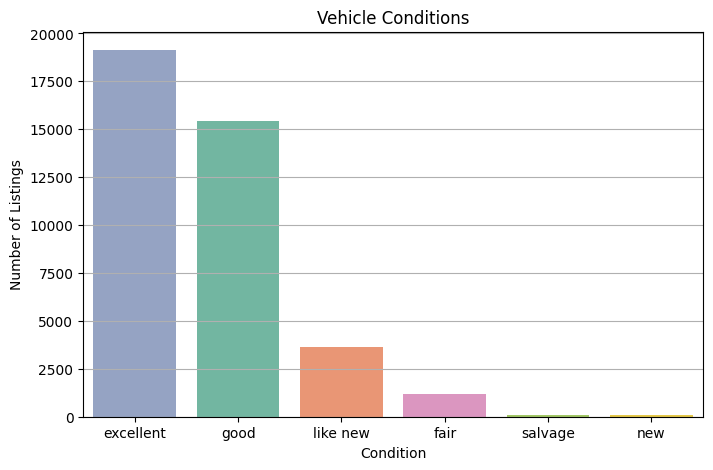

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='condition', hue='condition', order=df['condition'].value_counts().index, palette='Set2', legend=False)
plt.title('Vehicle Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Listings')
plt.grid(True, axis='y')
plt.show()

## comparing how price afects by conditions

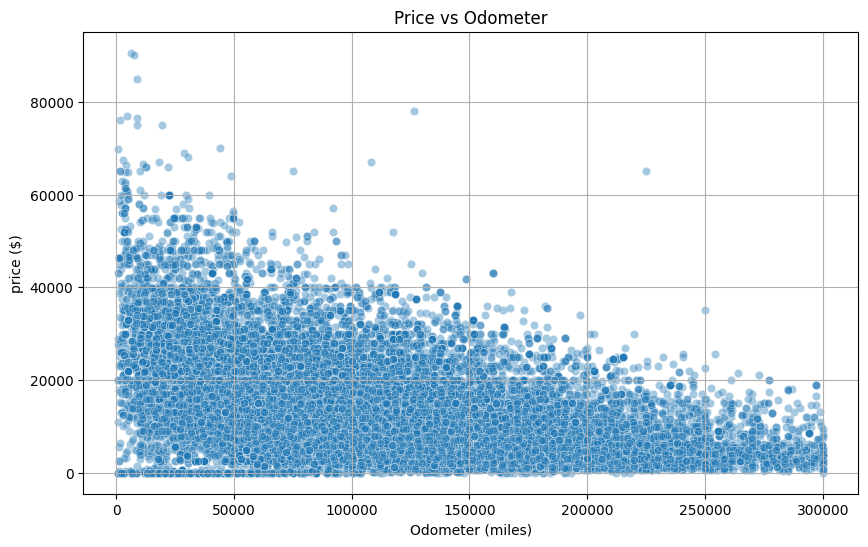

In [16]:
#Price Vs Odometer (Mileage Impact)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.4)
plt.title('Price vs Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('price ($)')
plt.grid(True)
plt.show()

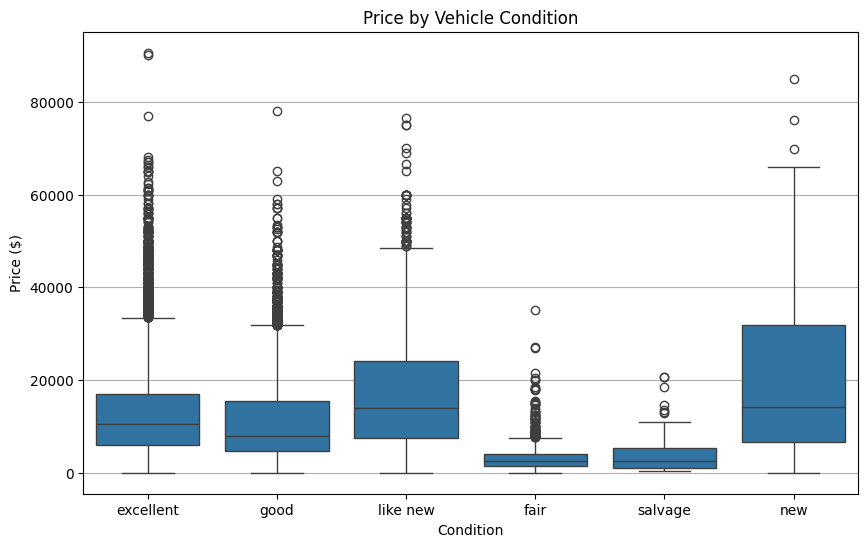

In [17]:
# Price by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='condition', y='price', order=df['condition'].value_counts().index)
plt.title('Price by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.grid(True, axis='y')
plt.show()
